<a href="https://colab.research.google.com/github/chathurapr/DSA-Code/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Agglomerative Clustering**


### Mounting the drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


### Read data into dataframe

In [ ]:
import pandas as pd
with open("/content/drive/MyDrive/BDA-Data/Clustering Data.csv") as file:
  df = pd.read_csv(file)
df.set_index('CUST_ID', inplace=True)  
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Check missing values

In [ ]:
df.isnull().sum() #Summary of missing values
#df.info()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Fill NaN with imputation - Mean value

In [ ]:
updated_df = df
updated_df['CREDIT_LIMIT']=updated_df['CREDIT_LIMIT'].fillna(updated_df['CREDIT_LIMIT'].mean())
updated_df['MINIMUM_PAYMENTS']=updated_df['MINIMUM_PAYMENTS'].fillna(updated_df['MINIMUM_PAYMENTS'].mean())
updated_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Normalize the columns

In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()
new_data_scaled = data_scaled #For K-Means

### Draw dendogram

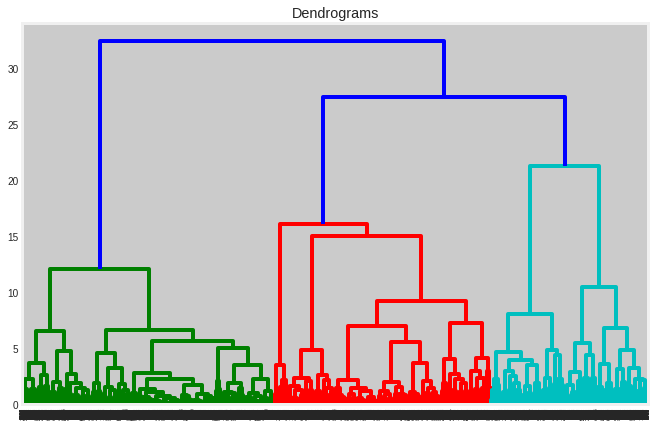

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

### Plot with a threshold point

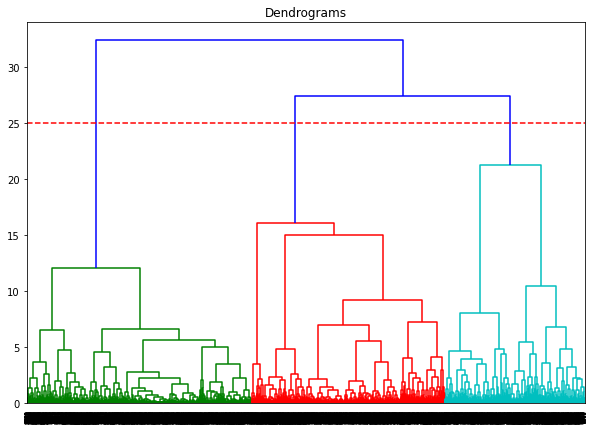

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=25, color='r', linestyle='--')

### Apply hierarchical clustering with agglomerative clustering 

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
X = cluster.fit_predict(data_scaled)
#X = set(X)
print(X[:5])

[1 0 1 1 2]


### Add the cluster label to the data

In [ ]:
data_scaled["Class"] = X
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Class
0,0.039353,0.000787,0.091790,0.000000,0.09179,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546,1
1,0.293876,0.000083,0.000000,0.000000,0.00000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101,0
2,0.310798,0.000125,0.096307,0.096307,0.00000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495,1
3,0.207829,0.000079,0.186921,0.186921,0.00000,0.025661,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.935229,0.000000,0.107764,0.00000,0.001496,1
4,0.504284,0.000617,0.009867,0.009867,0.00000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400,2


### Visualizing clusters

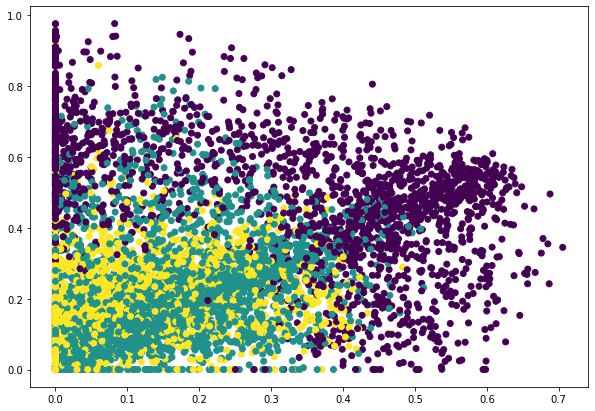

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['PURCHASES'], data_scaled['PAYMENTS'], c=cluster.labels_) 

##** References **
### https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
### https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/

## **K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans
KMCluster = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
KMCluster.fit(new_data_scaled)
KMCluster.labels_[:5]

array([1, 0, 1, 1, 0], dtype=int32)

### Best number of clusters - the Elbow method

In [ ]:
kmeans_kwargs = {
            "init": "random",
             "n_init": 10,
             "max_iter": 300,
            "random_state": 42,
      }

        # A list holds the SSE values for each k
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)  # Uses the dictionary unpacking operator (**)
  kmeans.fit(new_data_scaled)
  sse.append(kmeans.inertia_)

print(sse)


[2230.878547573868, 1635.1239334975398, 1259.5833776300342, 1035.802211748874, 890.2123904638989, 762.9570397175166, 692.909589455209, 643.8159946355088, 603.5016796356564, 565.8201869461932]


### Plot the SSE

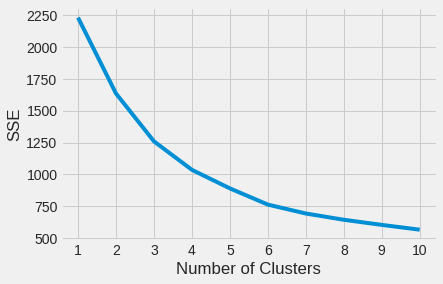

In [ ]:
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")  #There are pre-built styles in matplotlib - same as css styling the webpages
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### Automatically locating the elbow point

In [ ]:
pip install kneed

In [ ]:
from kneed import DataGenerator, KneeLocator
kl = KneeLocator(
     range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

4

## **Using the silhouette coefficient**

The **silhouette coefficient** is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

  - How close the data point is to other points in the cluster
  - How far away the data point is from points in other clusters
  
Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In the scikit-learn implementation of the silhouette coefficient, the average silhouette coefficient of all the samples is summarized into one score. The silhouette score() function needs a minimum of two clusters, or it will raise an exception.

-https://realpython.com/k-means-clustering-python/

In [ ]:
from sklearn.metrics import silhouette_score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(new_data_scaled)
  score = silhouette_score(new_data_scaled, kmeans.labels_)
  silhouette_coefficients.append(score)

### Plotting the silhouette coefficients

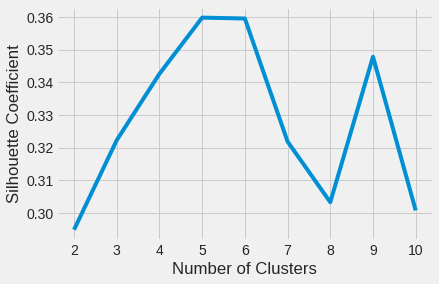

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### Further reading: https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad

In [ ]:
pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=3ec28e477523230d9bc82c6fed84ed9348138fe1fcd4418fe50aafe131a8a0b4
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


In [ ]:
data = new_data_scaled.to_numpy()
print(data)

[[3.93529208e-02 7.87219116e-04 9.17897286e-02 ... 1.34230246e-01
  0.00000000e+00 1.15458778e-02]
 [2.93875725e-01 8.34231054e-05 0.00000000e+00 ... 9.84037362e-02
  2.03922922e-05 1.10118488e-03]
 [3.10797802e-01 1.24560826e-04 9.63066935e-02 ... 7.81351110e-02
  0.00000000e+00 1.49472991e-03]
 ...
 [2.27729209e-02 8.11047126e-04 1.40538302e-01 ... 8.02142497e-02
  2.43314235e-04 5.83954164e-03]
 [2.65239400e-02 1.64244246e-03 0.00000000e+00 ... 1.09890537e-01
  4.92732934e-04 1.18255904e-02]
 [1.86405379e-01 3.33425336e-04 5.46775599e-01 ... 4.41566401e-02
  0.00000000e+00 3.00082652e-03]]


In [ ]:
import numpy as np
from minisom import MiniSom 
som_shape = (6, 6)   
som = MiniSom(som_shape[0], som_shape[1], len(data[0]), sigma=0.5, learning_rate=0.5)
som.train_random(data, 100)

# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T # T is the transpose

# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape) #The linear index value in a 6x6 grid

#print(som.winner(data[8]))
#print(cluster_index[0:10])
#print(np.unique(cluster_index))

[[4 4 4 ... 4 4 4]
 [2 3 3 ... 2 2 2]]


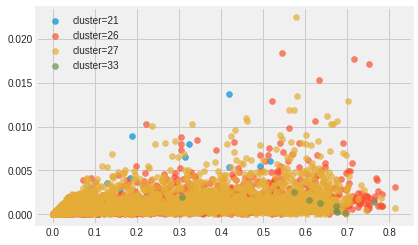

In [ ]:
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 5],
                data[cluster_index == c, 10], label='cluster='+str(c), alpha=.7)
plt.legend();

#### Additional reading: https://github.com/JustGlowing/minisom/blob/master/examples/Clustering.ipynb
https://reposhub.com/python/deep-learning/JustGlowing-minisom.html